## Setup and verify PyTorch 1.0 and FastAI 1.0 installed on Colab. Make sure running with GPU.

In [0]:
#!pip install fastai==1.0.46 --force-reinstall
!pip install fastai -U

Requirement already up-to-date: fastai in ./lib/python3.7/site-packages (1.0.53.post2)


In [0]:
#!pip list

In [0]:
import torch
import fastai

from fastai import *
from fastai.vision import *

print(torch.__version__)
print(fastai.__version__)

print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

ImportError: ignored

Alright. Now we have a fastai version that should work. Let's get the data and look at some dogs and cats.

In [0]:
path = untar_data(URLs.DOGS)
path

PosixPath('/root/.fastai/data/dogscats')

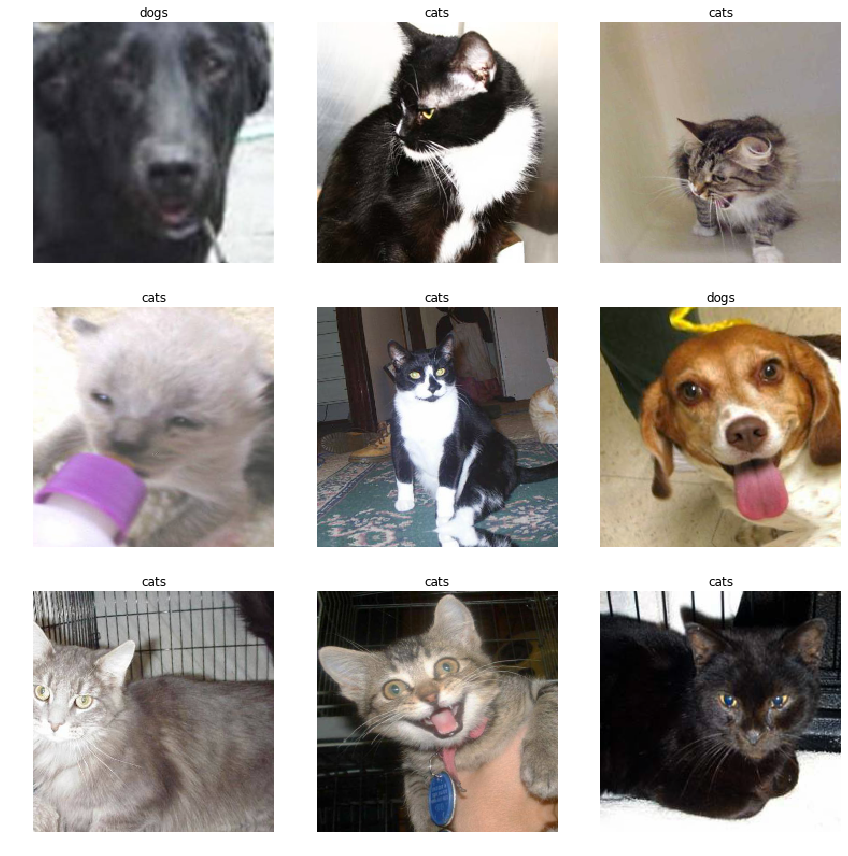

In [0]:
data = ImageDataBunch.from_folder(path, bs=256, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
data.show_batch(rows=3)

In [0]:
learner = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learner.fit_one_cycle(1)

In [0]:
learner.unfreeze()
learner.fit_one_cycle(1, slice(1e-5,3e-4), pct_start=0.05)

In [0]:
accuracy(*learner.TTA())

tensor(0.9950)

In [0]:
learner.interpret()

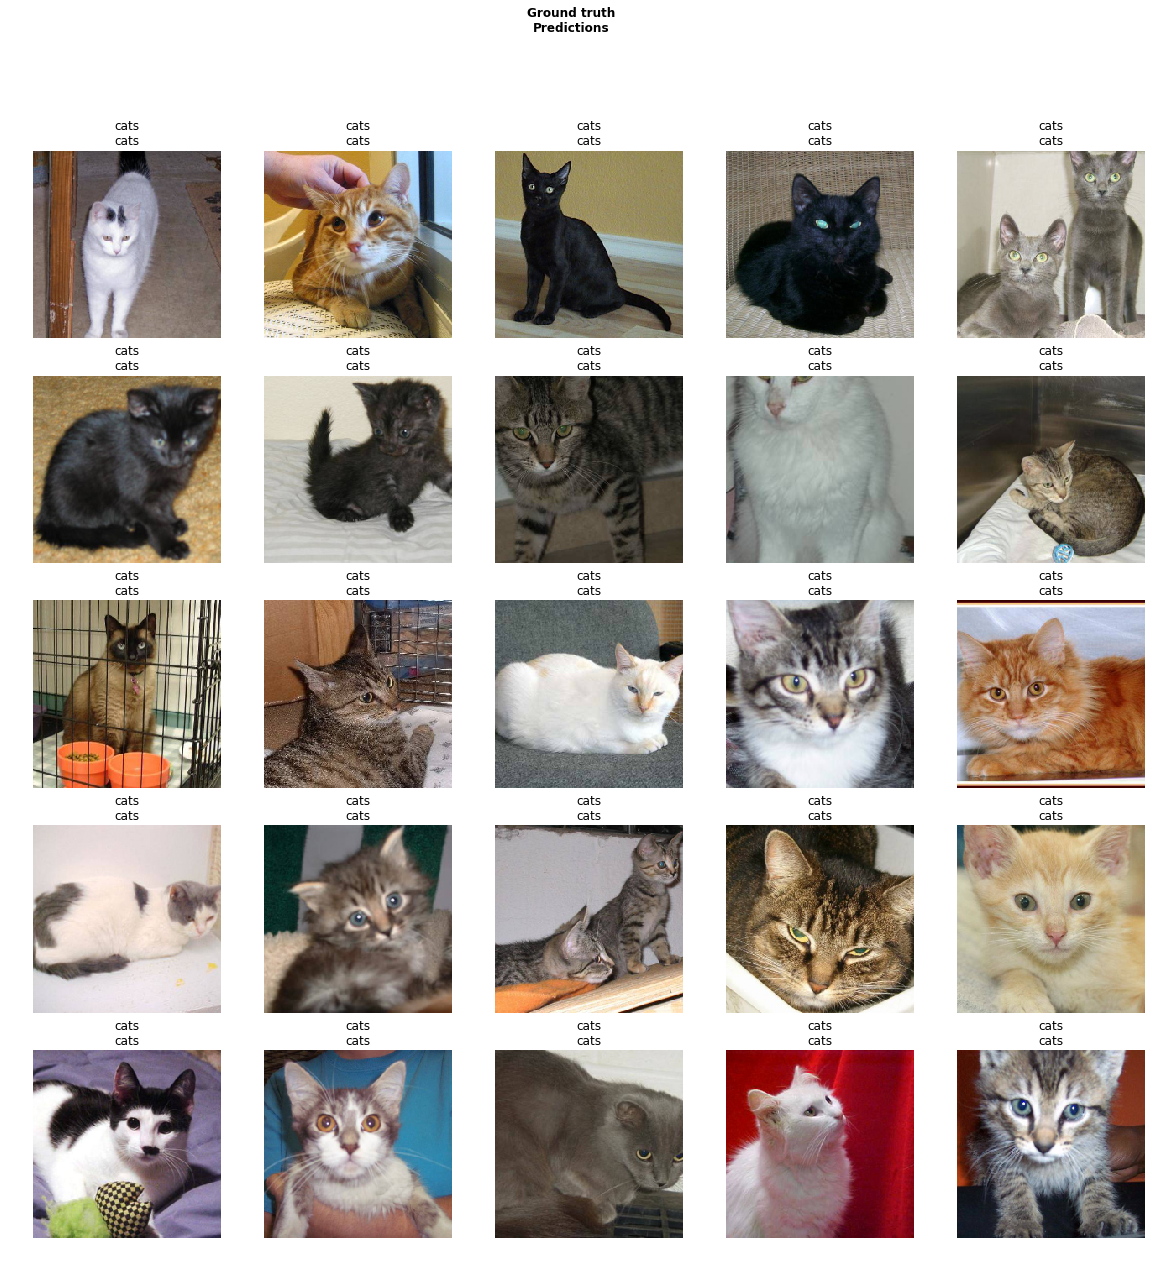

In [0]:
learner.show_results()

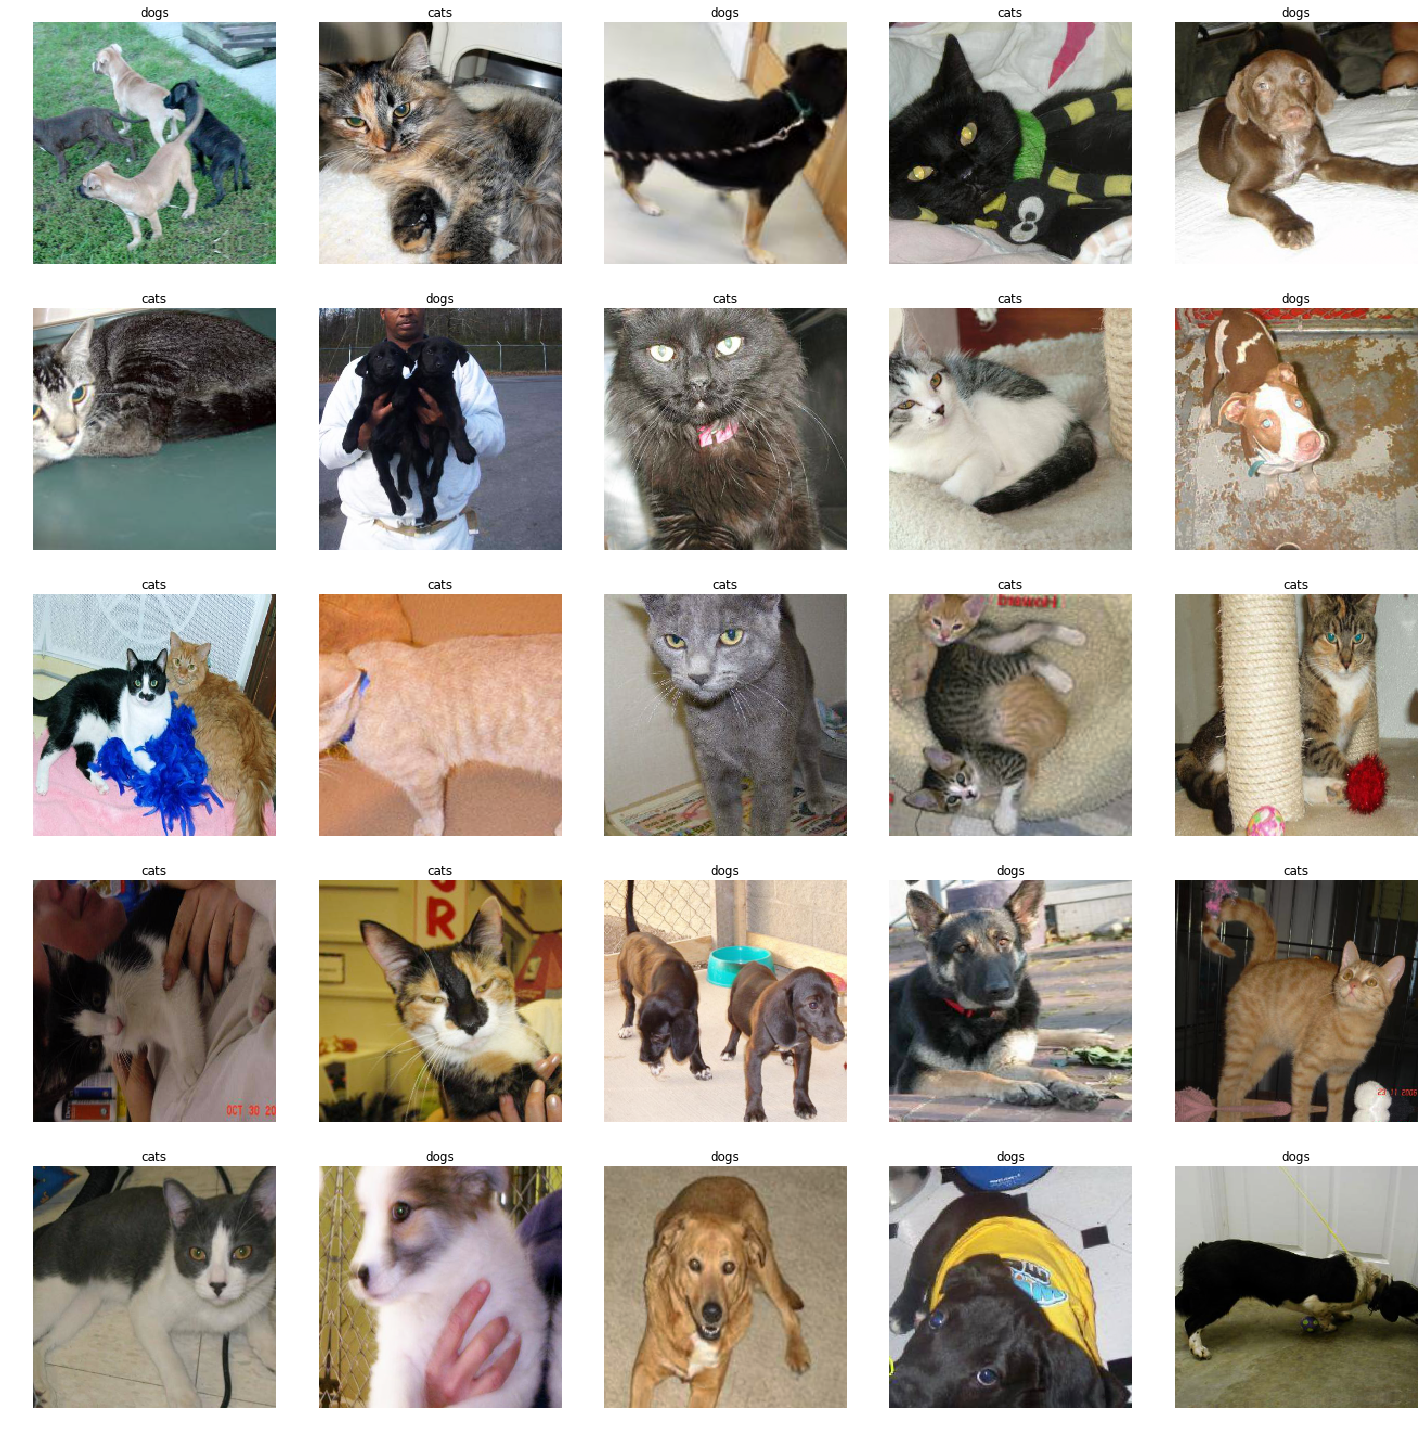

In [0]:
data.show_batch()

In [0]:
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)

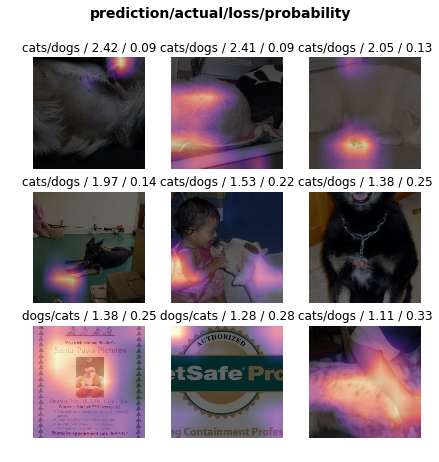

In [0]:
interp.plot_top_losses(9, figsize=(7,7))

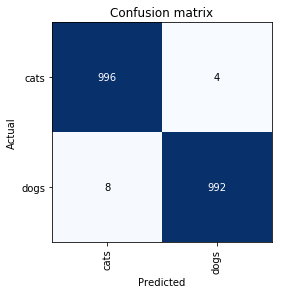

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('dogs', 'cats', 8), ('cats', 'dogs', 4)]

In [0]:
data.classes

['cats', 'dogs']

In [0]:
len(data.train_ds)

23000

In [0]:
len(data.valid_ds)

2000

In [0]:
!cat /proc/cpuinfo